Add features referring to the following
https://www.kaggle.com/code/manavtrivedi/tuffline-plotly-amex?scriptVersionId=102868130

# **Import**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import random

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_feather('../input/amexfeather/train_data.ftr')
df_train = df_train.groupby('customer_ID').tail(1).set_index('customer_ID')

In [3]:
df_train.shape

(458913, 190)

In [4]:
df_train = df_train.dropna(axis=1, thresh=int(0.80 * len(df_train)))
df_train.shape

(458913, 156)

# **Feature**

In [5]:
df_train["c_PD_239"]=df_train["D_39"]/(df_train["P_2"]*(-1)+0.0001)
df_train["c_PB_29"]=df_train["P_2"]*(-1)/(df_train["B_9"]*(1)+0.0001)
df_train["c_PR_21"]=df_train["P_2"]*(-1)/(df_train["R_1"]+0.0001)

df_train["c_BBBB"]=(df_train["B_9"]+0.001)/(df_train["B_23"]+df_train["B_3"]+0.0001)
df_train["c_BBBB1"]=(df_train["B_33"]*(-1))+(df_train["B_18"]*(-1)+df_train["S_25"]*(1)+0.0001)
df_train["c_BBBB2"]=(df_train["B_19"]+df_train["B_20"]+df_train["B_4"]+0.0001)

df_train["c_RRR0"]=(df_train["R_3"]+0.001)/(df_train["R_2"]+df_train["R_4"]+0.0001)
df_train["c_RRR1"]=(df_train["D_62"]+0.001)/(df_train["D_112"]+df_train["R_27"]+0.0001)

df_train["c_PD_348"]=df_train["D_48"]/(df_train["P_3"]+0.0001)
df_train["c_PD_355"]=df_train["D_55"]/(df_train["P_3"]+0.0001)

df_train["c_PD_439"]=df_train["D_39"]/(df_train["P_4"]+0.0001)
df_train["c_PB_49"]=df_train["B_9"]/(df_train["P_4"]+0.0001)
df_train["c_PR_41"]=df_train["R_1"]/(df_train["P_4"]+0.0001)
print(df_train.shape)

(458913, 169)


In [6]:
df_train

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_44,...,c_BBBB,c_BBBB1,c_BBBB2,c_RRR0,c_RRR1,c_PD_348,c_PD_355,c_PD_439,c_PB_49,c_PR_41
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,0.003258,...,0.221191,-1.042969,0.083862,0.064148,0.222046,0.305664,0.297607,1.368164,1.430664,0.916016
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,0.008781,...,0.700195,-1.027344,0.033081,12.320312,0.116577,0.025742,0.063232,37.437500,2.716797,1.453125
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,0.000628,...,0.377197,-1.032227,0.039948,1.926758,0.218750,0.127808,0.157349,3.468750,3.357422,2.304688
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,0.007793,...,1.425781,-1.041992,0.023605,15.953125,0.216919,NaN,0.031830,0.135254,2.564453,0.978027
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,0.002436,...,0.033325,-0.567383,0.284912,0.266113,0.210327,0.570312,0.445557,0.599121,0.433105,0.134155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,2018-03-31,0.844238,0.447510,0.028519,1.009766,0.001928,0.128662,0.003483,0.005894,0.002281,...,5.476562,-1.033203,0.061218,59.000000,0.228638,0.110352,0.066528,73.625000,28.000000,0.317139
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,2018-03-22,0.831055,0.033661,0.292480,0.055664,0.006954,NaN,0.005791,0.233032,0.132202,...,0.290527,0.877441,2.000000,7.410156,0.047241,0.304688,0.259277,13.007812,55.312500,2.687500
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,2018-03-07,0.800293,0.267090,0.020569,1.006836,0.000957,0.066650,0.007423,0.006313,0.001022,...,1.083008,-1.031250,0.088318,0.613281,0.111572,0.185669,0.173950,38.562500,6.703125,0.138184


# **Model&Predict**

In [7]:
y = df_train['target']
X = df_train.drop(['target'],axis=1).drop("S_2", axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26,stratify=y)

print("X_train Training Data Size :",X_train.shape[0])
print("X_test Testing Data Size   :",X_test.shape[0])

X_train Training Data Size : 367130
X_test Testing Data Size   : 91783


In [8]:
Xname = X.columns

In [9]:
import optuna.integration.lightgbm as lgb

In [10]:
TEST_SIZE = 0.2
RANDOM_STATE = 42
# trainのデータセットの3割をモデル学習時のバリデーションデータとして利用する
X_train, X_valid, y_train, y_valid = train_test_split(X_train,
                                                    y_train,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

# LightGBMを利用するのに必要なフォーマットに変換
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
# import lightgbm as lgb
# import optuna.integration.lightgbm as lgb
# model = lgb.LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

In [13]:
params = {
    'objective': 'mean_squared_error',
    'metric': 'mae',
    "verbose": -1,#verbosity
    "verbose_eval":-1,
    "boosting_type": "gbdt",
}

best_params, history = {}, []

# LightGBM学習
gbm = lgb.train(params,
                lgb_train,
                num_boost_round = 200,
                valid_sets=[lgb_train, lgb_eval],
                early_stopping_rounds=50,
                verbose_eval = False
               )

best_params = gbm.params
best_params

[I 2022-08-21 18:13:56,984] A new study created in memory with name: no-name-8d475a30-342d-44c0-bcba-a691816d34ef
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: verbose_eval


min_data_in_leaf, val_score: 0.146162: 100%|##########| 5/5 [04:07<00:00, 49.52s/it]


{'objective': 'mean_squared_error',
 'metric': 'l1',
 'verbose': -1,
 'verbose_eval': -1,
 'boosting_type': 'gbdt',
 'feature_pre_filter': False,
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'num_leaves': 158,
 'feature_fraction': 1.0,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 20,
 'num_iterations': 200,
 'early_stopping_round': 50,
 'categorical_column': [43, 44, 50, 87, 122, 127, 129, 130, 133, 139]}

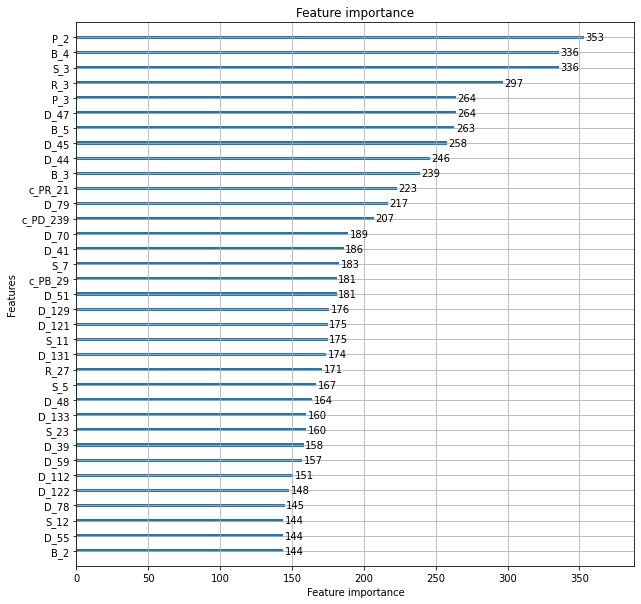

In [14]:
lgb.plot_importance(gbm, max_num_features = 35, figsize = (10,10))
plt.show()

In [15]:
# model = model.fit(X_train, y_train)

# Submissions

In [16]:
import numpy as np 
import pandas as pd 
import glob
from scipy.stats import rankdata

paths = [x for x in glob.glob('../input/*/*.csv') if 'amex-default-prediction' not in x]
dfs = [pd.read_csv(x) for x in paths]
dfs = [x.sort_values(by='customer_ID') for x in dfs]

paths = [x for x in glob.glob('../input/*/*.csv') if 'amex-default-prediction' not in x]
paths

for df in dfs:
    df['prediction'] = np.clip(df['prediction'], 0, 1)

In [17]:
paths = [x for x in glob.glob('../input/*/*.csv') if 'amex-default-prediction' not in x]
dfs = [pd.read_csv(x) for x in paths]
dfs = [x.sort_values(by='customer_ID') for x in dfs]

In [18]:
weights = [0.52, 0.85, 0.97, 0.57, 1.02, 0.8]# [0.52, 0.87, 0.95, 0.57, 1, 0.8]

In [19]:
submit = pd.read_csv('../input/amex-default-prediction/sample_submission.csv')
submit['prediction'] = 0

for df, weight in zip(dfs, weights):
    submit['prediction'] += (df['prediction'] * weight)
    
submit['prediction'] /= np.sum(weights)

submit.to_csv('mean_submission.csv', index=None)

 
submit = pd.read_csv('../input/amex-default-prediction/sample_submission.csv')
submit['prediction'] = 0

for df, weight in zip(dfs, weights):
    submit['prediction'] += (rankdata(df['prediction'])/df.shape[0]) * weight
    
submit['prediction'] /= 4

In [20]:
test = pd.read_feather('../input/amexfeather/test_data.ftr')
df_train = test.groupby('customer_ID').tail(1).set_index('customer_ID')

In [21]:
df_train.columns

Index(['S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=189)

In [22]:
df_train = df_train.dropna(axis=1, thresh=int(0.80 * len(df_train)))

df_train["c_PD_239"]=df_train["D_39"]/(df_train["P_2"]*(-1)+0.0001)
df_train["c_PB_29"]=df_train["P_2"]*(-1)/(df_train["B_9"]*(1)+0.0001)
df_train["c_PR_21"]=df_train["P_2"]*(-1)/(df_train["R_1"]+0.0001)

df_train["c_BBBB"]=(df_train["B_9"]+0.001)/(df_train["B_23"]+df_train["B_3"]+0.0001)
df_train["c_BBBB1"]=(df_train["B_33"]*(-1))+(df_train["B_18"]*(-1)+df_train["S_25"]*(1)+0.0001)
df_train["c_BBBB2"]=(df_train["B_19"]+df_train["B_20"]+df_train["B_4"]+0.0001)

df_train["c_RRR0"]=(df_train["R_3"]+0.001)/(df_train["R_2"]+df_train["R_4"]+0.0001)
df_train["c_RRR1"]=(df_train["D_62"]+0.001)/(df_train["D_112"]+df_train["R_27"]+0.0001)

df_train["c_PD_348"]=df_train["D_48"]/(df_train["P_3"]+0.0001)
df_train["c_PD_355"]=df_train["D_55"]/(df_train["P_3"]+0.0001)

df_train["c_PD_439"]=df_train["D_39"]/(df_train["P_4"]+0.0001)
df_train["c_PB_49"]=df_train["B_9"]/(df_train["P_4"]+0.0001)
df_train["c_PR_41"]=df_train["R_1"]/(df_train["P_4"]+0.0001)


In [23]:
X = df_train.drop("S_2", axis=1)
X = X[Xname]

In [24]:
# Y_pred = model.predict_proba(X)

In [25]:
Y_pred = gbm.predict(X, num_iteration=gbm.best_iteration)

In [26]:
Y_pred

array([ 0.01436124, -0.0046519 ,  0.06060411, ...,  0.65862108,
        0.30642061,  0.03926589])

In [27]:
submit['prediction'] = (submit['prediction'])*(0.995)+(Y_pred)*(0.005)

In [28]:
submit.to_csv('submission.csv', index=None)    

In [29]:
submit.head()

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.297401
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.042969
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.301397
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.379906
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.522110
